In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
path = "/content/drive/MyDrive/bm/"
sys.path.append(path)

Using CPU
Loading MNIST dataset
Done loading MNIST
Loading weights from: /content/drive/MyDrive/bm/models/db_0
Loading weights from: /content/drive/MyDrive/bm/models/db_1
Loading weights from: /content/drive/MyDrive/bm/models/db_2
Fine-tuning
Validating model
Loading weights from: /content/drive/MyDrive/bm/models/db_0
Loading weights from: /content/drive/MyDrive/bm/models/db_1
Loading weights from: /content/drive/MyDrive/bm/models/db_2
Fine-tuning
Validating model
Loading weights from: /content/drive/MyDrive/bm/models/db_0
Loading weights from: /content/drive/MyDrive/bm/models/db_1
Loading weights from: /content/drive/MyDrive/bm/models/db_2
Fine-tuning
Validating model
Loading weights from: /content/drive/MyDrive/bm/models/db_0
Loading weights from: /content/drive/MyDrive/bm/models/db_1
Loading weights from: /content/drive/MyDrive/bm/models/db_2
Fine-tuning
Validating model
Loading weights from: /content/drive/MyDrive/bm/models/db_0
Loading weights from: /content/drive/MyDrive/bm/model

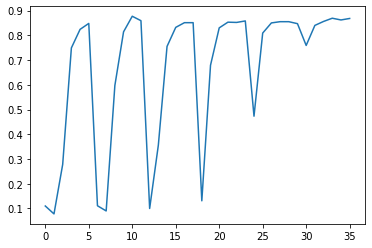

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from dbimage_torch import DBImage
plt.rcParams['image.cmap'] = 'Greys_r'

print("Loading MNIST dataset")
with open(path+'data/train_data.npy', 'rb') as f:
    train_X = torch.from_numpy(np.load(f))
with open(path+'data/train_labels.npy', 'rb') as f:
    train_labels = torch.from_numpy(np.load(f))
with open(path+'data/test_data.npy', 'rb') as f:
    test_X = torch.from_numpy(np.load(f))
with open(path+'data/test_labels.npy', 'rb') as f:
    test_labels = torch.from_numpy(np.load(f))


print("Done loading MNIST")
n_train = 10000
n_test = 1000

test_X = train_X[-n_test:,:,:].float()
train_X = train_X[:n_train,:,:].float()
test_labels = train_labels[-n_test:].float()
train_labels = train_labels[:n_train].float()

lrs = torch.arange(6,12)
decays = torch.arange(6)
decays = torch.exp(-decays - 1)
base= 1.0
ls = []
ds = []
vals = []
stds = []
max_val = -1
max_l = -1 
max_decay = -1

for l in lrs:
  for d in decays:
    a = []
    for i in range(1):
      model = DBImage(28,28,10,[500,500,2000],batch_size=50,learning_rate=0.01,momentum=0.5,weight_decay=d,tune_rate=base/(2**l))
      model.set_images(train_X, train_labels,split=1)
      model.load_weights(path+"models/db_")
      model.tune(10,save=False, filename=path + "models/test_")
      acc = model.validate(test_X,test_labels,filename=path+"figures/DBN/", full=False, no_print=True)
      a.append(acc)
    vals.append(torch.mean(torch.tensor(a)))
    stds.append(torch.std(torch.tensor(a)))
    ls.append(base/(2**l))
    ds.append(d)

    if torch.mean(torch.tensor(a)) > max_val or max_val <0:
      max_val = torch.mean(torch.tensor(a))
      max_l = l
      max_decay = d


print("Best accuracy: ", max_val)
print("Best learning_rate: ", base/(2**max_l))
print( "Best weight_decay:", max_decay)
li = []
for l in ls:
  for d in ds:
    li.append([d, l])
print(li)
print(vals)
fig, ax = plt.subplots()
ax.plot(vals)
ax.fill_between(range(len(vals)), torch.tensor(vals) - torch.tensor(stds),torch.tensor(vals) + torch.tensor(stds),alpha=0.5)
plt.show()
#model.tune(30,save=True,filename=path+"models/db_")
#model.validate(test_X,test_labels,full=False,filename=path+"figures/DBN/")


Best accuracy:  tensor(0.8770)
Best parameter learning_rate:decay  tensor(0.0078) : tensor(0.0067)
parameter combinations:  [tensor(0.0156), tensor(0.0156), tensor(0.0156), tensor(0.0156), tensor(0.0156), tensor(0.0156), tensor(0.0078), tensor(0.0078), tensor(0.0078), tensor(0.0078), tensor(0.0078), tensor(0.0078), tensor(0.0039), tensor(0.0039), tensor(0.0039), tensor(0.0039), tensor(0.0039), tensor(0.0039), tensor(0.0020), tensor(0.0020), tensor(0.0020), tensor(0.0020), tensor(0.0020), tensor(0.0020), tensor(0.0010), tensor(0.0010), tensor(0.0010), tensor(0.0010), tensor(0.0010), tensor(0.0010), tensor(0.0005), tensor(0.0005), tensor(0.0005), tensor(0.0005), tensor(0.0005), tensor(0.0005)] [tensor(0.3679), tensor(0.1353), tensor(0.0498), tensor(0.0183), tensor(0.0067), tensor(0.0025), tensor(0.3679), tensor(0.1353), tensor(0.0498), tensor(0.0183), tensor(0.0067), tensor(0.0025), tensor(0.3679), tensor(0.1353), tensor(0.0498), tensor(0.0183), tensor(0.0067), tensor(0.0025), tensor(0.3

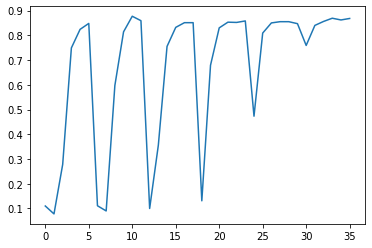

In [4]:
print("Best accuracy: ", max_val)
print("Best parameter learning_rate:decay ", base/(2**max_l), ":", max_decay)
print("parameter combinations: " , ls,ds)
print("accuracies: ", vals)
fig, ax = plt.subplots()
ax.plot(vals)
ax.fill_between(range(len(vals)), torch.tensor(vals) - torch.tensor(stds),torch.tensor(vals) + torch.tensor(stds),alpha=0.5)
plt.show()